In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

plt.style.use('ggplot')
import librosa
from librosa import feature
from librosa import display
genres = [
    'blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop',
    'reggae', 'rock'
]

In [2]:
# load dataframe from csv
dfFeatures = pd.read_csv("music_features.csv")



# extract genres for labels
genreList = dfFeatures['genre']

# drop genres and filenames for training data
dfFeatures= dfFeatures.drop(columns = ['filename', 'genre'])

dfFeatures.head()

,chroma_stft_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
0,0.342053,1782.622682,2020.556328,3845.075667,0.080111,123.046875,-125.188171,120.222137,-18.358818,44.887314,...,-8.861547,9.301556,-4.159669,7.119120,-5.663028,0.530103,-2.870996,0.306077,-2.700369,2.370232
1,0.358000,1364.273766,1842.030467,2976.303348,0.055211,107.666016,-221.931198,131.147629,0.490468,39.101952,...,-3.123051,6.931743,-1.881995,4.951429,-4.531081,-0.463962,0.497853,0.039326,-1.083576,-0.112309
2,0.382027,1521.556846,1736.799388,3028.062974,0.070182,151.999081,-99.112022,141.554123,-25.738703,34.465645,...,-12.999936,4.544575,-8.695225,-2.315017,-8.144971,2.917833,-6.660074,-2.039234,-2.045270,-2.697336
3,0.391765,947.018874,1427.836298,1863.946038,0.030092,63.024009,-214.465668,156.586929,2.785257,26.750803,...,2.481811,4.701363,-2.364664,-0.866406,-3.422017,-0.273013,0.231585,2.437521,1.284240,-2.200283
4,0.316456,2046.427867,1858.463045,4005.025898,0.116385,135.999178,-151.967178,115.340431,-31.880495,23.762522,...,-16.674786,-4.082293,-4.755991,-7.974098,-9.649985,-2.115260,-8.198335,-1.059961,-3.900608,-12.995133


In [3]:
# standardize data  
scaler = StandardScaler()
X = scaler.fit_transform(np.array(dfFeatures.iloc[:, :-1], dtype = float))

# encode labels 
encoder = LabelEncoder()
y = encoder.fit_transform(genreList)

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 2)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.20, random_state=2)

In [4]:
# initialize keras network
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
# configure model for training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# train model

# https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/
from keras import callbacks

#callback to prevent overfitting
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)


history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=128,
                    callbacks =[earlystopping])

Epoch 1/100
5/5 [==============================] - 2s 315ms/step - loss: 2.2801 - accuracy: 0.1548 - val_loss: 2.0934 - val_accuracy: 0.2937
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 2.0210 - accuracy: 0.2790 - val_loss: 1.9356 - val_accuracy: 0.3125
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 1.7967 - accuracy: 0.3610 - val_loss: 1.7769 - val_accuracy: 0.3375
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 1.6964 - accuracy: 0.3802 - val_loss: 1.6343 - val_accuracy: 0.4000
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 1.5211 - accuracy: 0.5000 - val_loss: 1.5396 - val_accuracy: 0.4563
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 1.4411 - accuracy: 0.5057 - val_loss: 1.4704 - val_accuracy: 0.4938
Epoch 7/100
5/5 [==============================] - 0s 21ms/step - loss: 1.3088 - accuracy: 0.5697 - val_loss: 1.4026 - val_accuracy: 0.5250
Epoch 8/100
5/5 [==

In [7]:
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 3ms/step - loss: 1.1214 - accuracy: 0.5700


<AxesSubplot:>

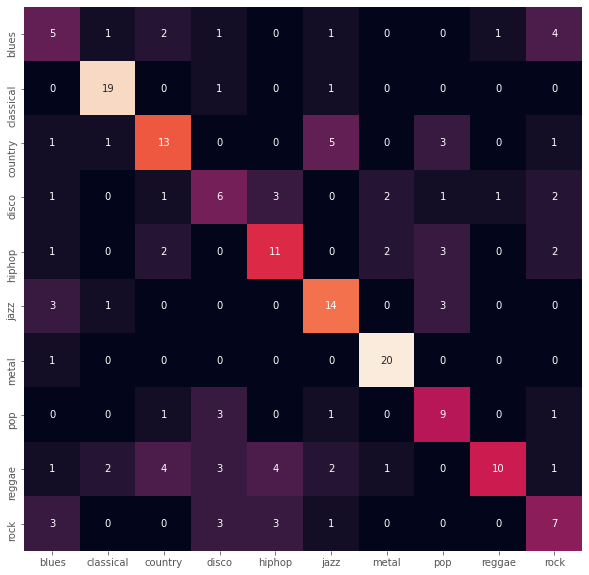

In [8]:
prediction = model.predict(X_test)
y_pred = []
for index, y_encode in enumerate(prediction):
    y_pred.append(np.argmax(y_encode))
corrMatrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix, annot = True, xticklabels=genres, yticklabels=genres, cbar=False)

Text(0.5, 0, 'Epoch')

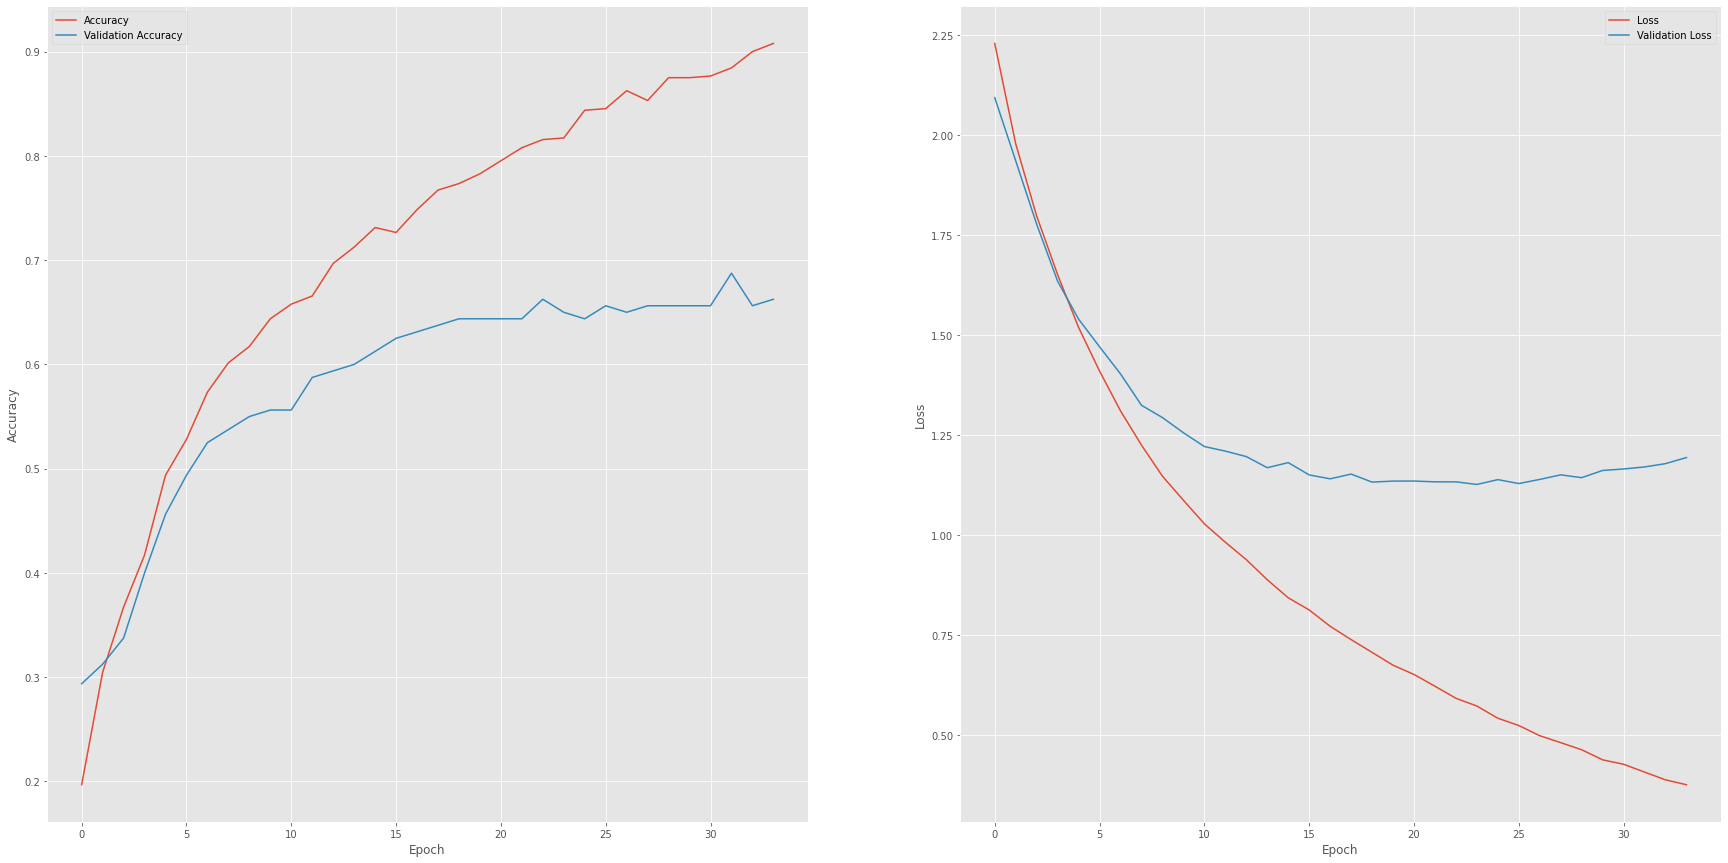

In [9]:
fig, ax = plt.subplots(1,2,figsize=(30,15))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[0].legend(["Accuracy", "Validation Accuracy"])
ax[1].legend(["Loss", "Validation Loss"])
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")

ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")

In [10]:
# initialize keras network
modeldropout = keras.Sequential()
modeldropout.add(keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(128, activation='relu'))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(64, activation='relu'))
modeldropout.add(keras.layers.Dropout(0.2))
modeldropout.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
modeldropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = modeldropout.fit(X_train,
                    y_train,
                    epochs=100,
                    callbacks =[earlystopping],
                    validation_data=(X_val, y_val),
                    batch_size=128)

Epoch 1/100
5/5 [==============================] - 1s 68ms/step - loss: 2.3330 - accuracy: 0.1303 - val_loss: 2.1685 - val_accuracy: 0.2188
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 2.1220 - accuracy: 0.2614 - val_loss: 2.0422 - val_accuracy: 0.3250
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 1.9949 - accuracy: 0.3081 - val_loss: 1.9280 - val_accuracy: 0.3313
Epoch 4/100
5/5 [==============================] - 0s 17ms/step - loss: 1.8730 - accuracy: 0.3554 - val_loss: 1.8223 - val_accuracy: 0.3313
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 1.7807 - accuracy: 0.3759 - val_loss: 1.6942 - val_accuracy: 0.3812
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 1.7178 - accuracy: 0.3759 - val_loss: 1.5835 - val_accuracy: 0.4062
Epoch 7/100
5/5 [==============================] - 0s 20ms/step - loss: 1.6233 - accuracy: 0.4361 - val_loss: 1.4967 - val_accuracy: 0.4250
Epoch 8/100
5/5 [===

In [13]:
test_loss, test_acc  = modeldropout.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 1ms/step - loss: 1.1299 - accuracy: 0.5900


<AxesSubplot:>

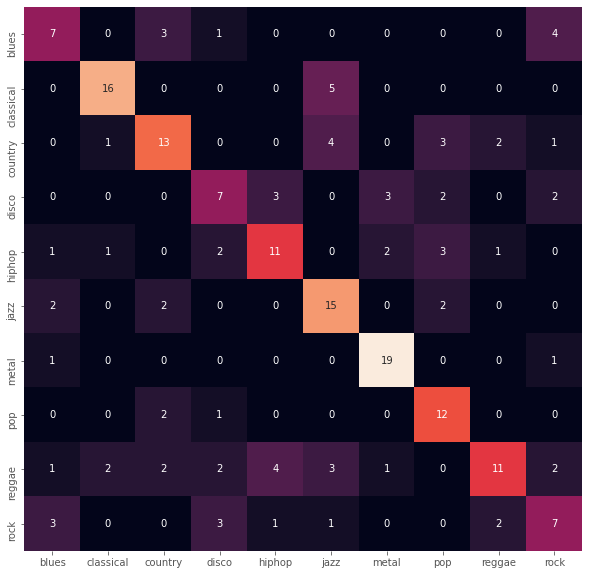

In [14]:
prediction = modeldropout.predict(X_test)
y_pred = []
for index, y_encode in enumerate(prediction):
    y_pred.append(np.argmax(y_encode))
corrMatrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix, annot = True, xticklabels=genres, yticklabels=genres, cbar=False)

Text(0.5, 0, 'Epoch')

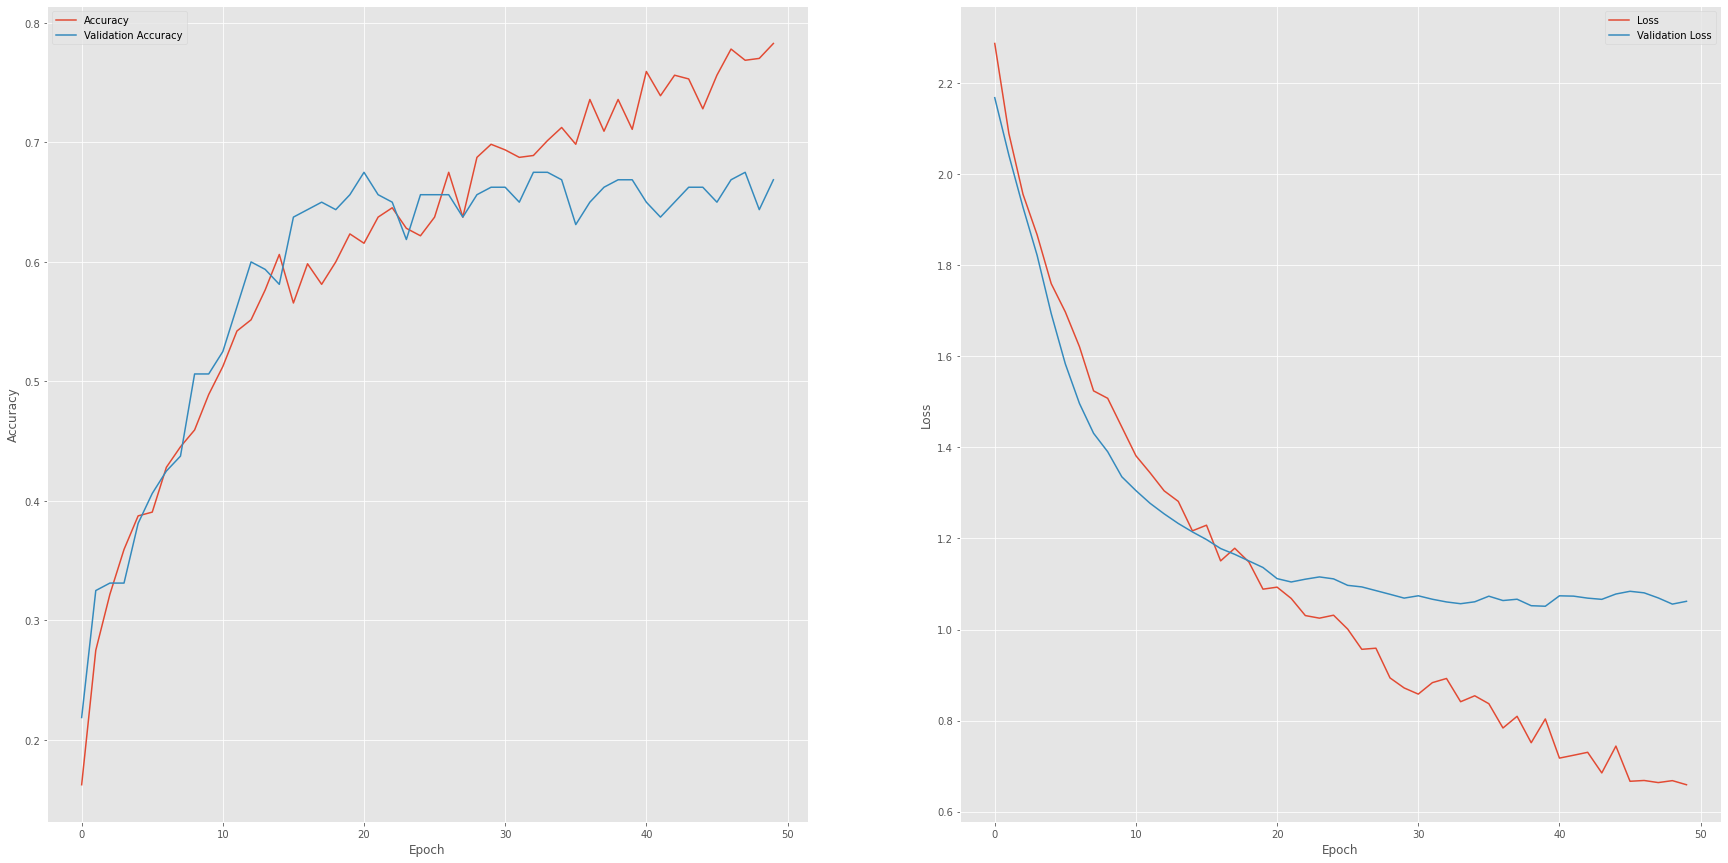

In [15]:
fig, ax = plt.subplots(1,2,figsize=(30,15))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[0].legend(["Accuracy", "Validation Accuracy"])
ax[1].legend(["Loss", "Validation Loss"])
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")

ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")

In [16]:
modelReg = keras.Sequential()
modelReg.add(keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4), input_shape=(X_train.shape[1],)))
modelReg.add(keras.layers.Dropout(0.2))
modelReg.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
modelReg.add(keras.layers.Dropout(0.2))
modelReg.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)))
modelReg.add(keras.layers.Dropout(0.2))
modelReg.add(keras.layers.Dense(10, activation='softmax', activity_regularizer=tf.keras.regularizers.l2(1e-4)))

In [17]:
modelReg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = modelReg.fit(X_train,
                    y_train,
                    epochs=100,
                    callbacks =[earlystopping],
                    validation_data=(X_val, y_val),
                    batch_size=128)

Epoch 1/100
5/5 [==============================] - 1s 64ms/step - loss: 2.3401 - accuracy: 0.1432 - val_loss: 2.1732 - val_accuracy: 0.2750
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 2.1591 - accuracy: 0.2770 - val_loss: 2.0268 - val_accuracy: 0.3375
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 2.0332 - accuracy: 0.3130 - val_loss: 1.9023 - val_accuracy: 0.3375
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 1.9224 - accuracy: 0.3699 - val_loss: 1.7900 - val_accuracy: 0.3500
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 1.8173 - accuracy: 0.3723 - val_loss: 1.6899 - val_accuracy: 0.3562
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 1.6936 - accuracy: 0.4093 - val_loss: 1.6123 - val_accuracy: 0.3812
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 1.6637 - accuracy: 0.4301 - val_loss: 1.5426 - val_accuracy: 0.4437
Epoch 8/100
5/5 [===

5/5 [==============================] - 0s 13ms/step - loss: 0.5175 - accuracy: 0.8396 - val_loss: 1.1231 - val_accuracy: 0.6562
Epoch 60/100
5/5 [==============================] - 0s 15ms/step - loss: 0.5450 - accuracy: 0.8303 - val_loss: 1.1169 - val_accuracy: 0.6625


In [19]:
test_loss, test_acc  = modelReg.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 2ms/step - loss: 1.1623 - accuracy: 0.6000


<AxesSubplot:>

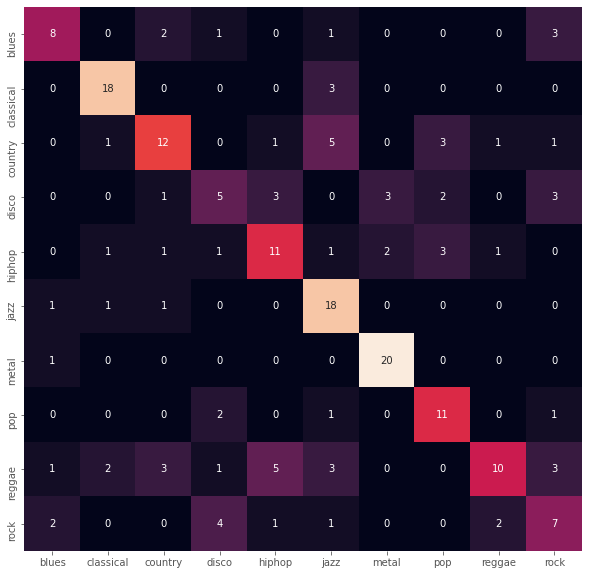

In [20]:
prediction = modelReg.predict(X_test)
y_pred = []
for index, y_encode in enumerate(prediction):
    y_pred.append(np.argmax(y_encode))
corrMatrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corrMatrix, annot = True, xticklabels=genres, yticklabels=genres, cbar=False)

Text(0.5, 0, 'Epoch')

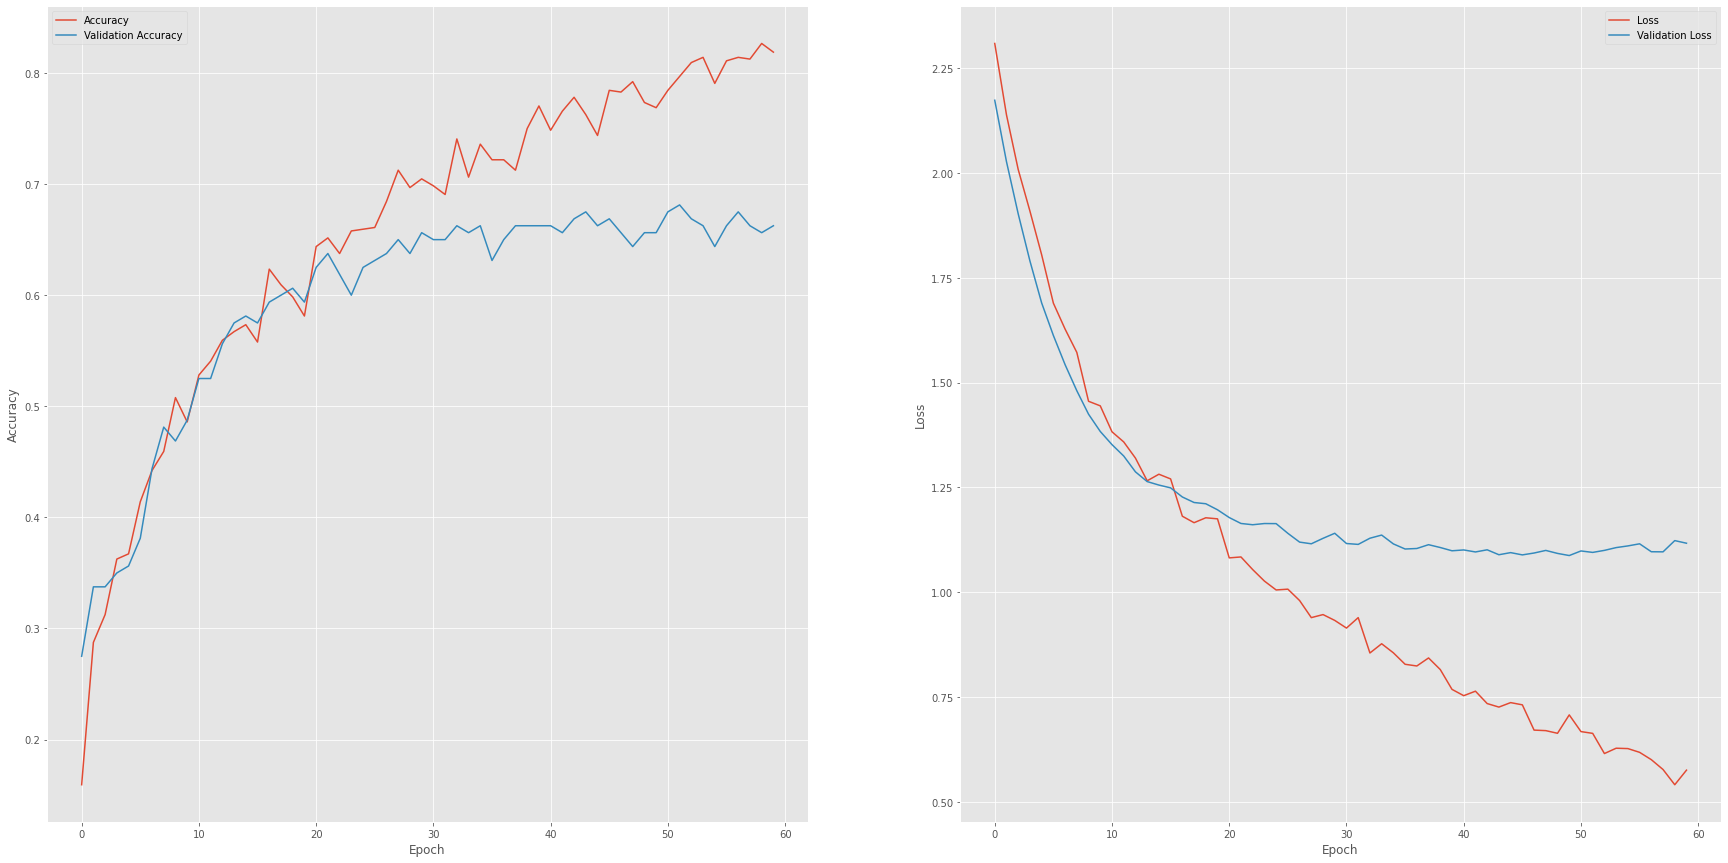

In [21]:
fig, ax = plt.subplots(1,2,figsize=(30,15))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[0].legend(["Accuracy", "Validation Accuracy"])
ax[1].legend(["Loss", "Validation Loss"])
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")

ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")